# Google Landmark Recognition Challenge 2020
Simplified image similarity ranking and re-ranking implementation with:
* EfficientNetB0 backbone for global feature similarity search
* DELF module for local feature reranking

Reference papers:
* 2020 Recognition challenge winner: https://arxiv.org/abs/2010.01650
* 2019 Recognition challenge 2nd place: https://arxiv.org/abs/1906.03990

In [2]:
!nvidia-smi

Sun Apr 10 05:50:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.119.04   Driver Version: 450.119.04   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Reranking examples

Queried image: 99c4d0b336c3725a.jpg


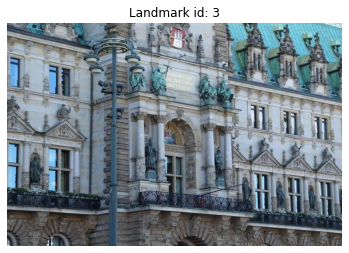

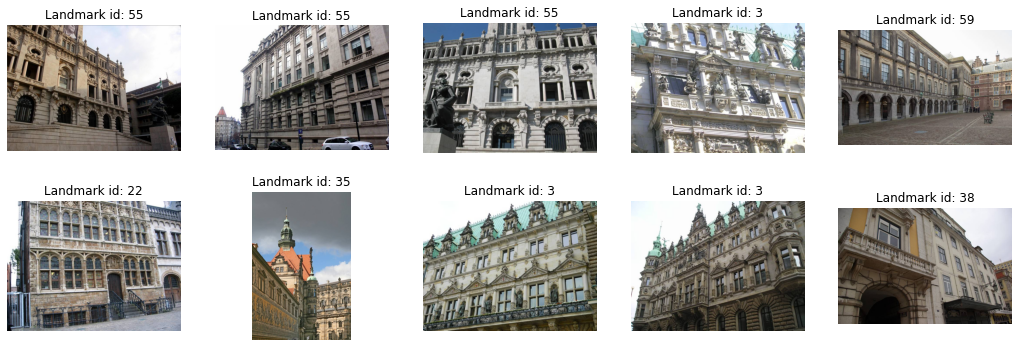

In [58]:
query_image_index = 1
top_n = 10

image_id = os.path.split(val_embeddings['images_paths'][query_image_index])[1]
query_landmark_id = os.path.split(os.path.split(val_embeddings['images_paths'][query_image_index])[0])[1]

similar_n = np.argsort(val_train_similarity[query_image_index])[::-1][:top_n]

print(f"Queried image: {image_id}")
plt.figure(figsize = (6, 6))
plt.imshow(get_image(val_embeddings['images_paths'][query_image_index]))
plt.title(f"Landmark id: {query_landmark_id}")
plt.axis("off")
plot_similar(similar_n, train_embeddings['images_paths'])

In [59]:
confidence_df = confidence_top(query = val_embeddings,
                               key = train_embeddings,
                               similarity = val_train_similarity,
                               query_image_index = query_image_index,
                               top = top_n)

confidence_df

top_similar                                        image_paths  prediction  \
0         3837  /kaggle/working/train_sub/55/6f3c0fdbc5025bed.jpg          55   
1         5428  /kaggle/working/train_sub/55/a496463fb5c6f735.jpg          55   
2         9130  /kaggle/working/train_sub/55/24528930457b8a00.jpg          55   
3         6174   /kaggle/working/train_sub/3/978d0656e8850f1c.jpg           3   
4         4451  /kaggle/working/train_sub/59/8910fe1e92090ae7.jpg          59   
5         9692  /kaggle/working/train_sub/22/79740c6946d9980b.jpg          22   
6         8353  /kaggle/working/train_sub/35/a45ef79729c0f473.jpg          35   
7         7667   /kaggle/working/train_sub/3/0f527a2836e53f88.jpg           3   
8         7514   /kaggle/working/train_sub/3/03d8283ab08c825b.jpg           3   
9         5371  /kaggle/working/train_sub/38/6071edbd010576b4.jpg          38   

   cos_similarity  
0        0.673456  
1        0.671897  
2        0.654891  
3        0.614097  
4        0.610814  
5        0.605878  
6        0.603839  
7        0.597670  
8        0.596630  
9        0.596334

In [60]:
reranked_df = delf_rerank(query = val_embeddings,
                          key = train_embeddings,
                          query_image_index = query_image_index,
                          confidence_df = confidence_df,
                          re_sort = True)
reranked_df

Retrieving local features for top 10 key images...


100%|██████████| 10/10 [00:10<00:00,  1.10s/it]


top_similar                                        image_paths  prediction  \
7         7667   /kaggle/working/train_sub/3/0f527a2836e53f88.jpg           3   
8         7514   /kaggle/working/train_sub/3/03d8283ab08c825b.jpg           3   
0         3837  /kaggle/working/train_sub/55/6f3c0fdbc5025bed.jpg          55   
2         9130  /kaggle/working/train_sub/55/24528930457b8a00.jpg          55   
5         9692  /kaggle/working/train_sub/22/79740c6946d9980b.jpg          22   
3         6174   /kaggle/working/train_sub/3/978d0656e8850f1c.jpg           3   
1         5428  /kaggle/working/train_sub/55/a496463fb5c6f735.jpg          55   
4         4451  /kaggle/working/train_sub/59/8910fe1e92090ae7.jpg          59   
6         8353  /kaggle/working/train_sub/35/a45ef79729c0f473.jpg          35   
9         5371  /kaggle/working/train_sub/38/6071edbd010576b4.jpg          38   

   cos_similarity  inliers  reranked_conf  
7        0.597670       46       4.053594  
8        0.596630       32       3.375050  
0        0.673456       17       2.776729  
2        0.654891       13       2.361243  
5        0.605878       14       2.266988  
3        0.614097       13       2.214159  
1        0.671897       10       2.124724  
4        0.610814       12       2.115923  
6        0.603839       11       2.002706  
9        0.596334       11       1.977818

Queried image: 99c4d0b336c3725a.jpg


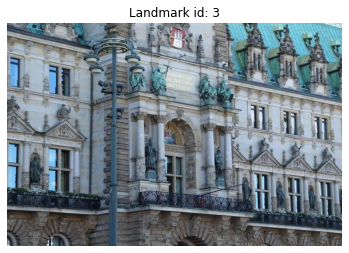

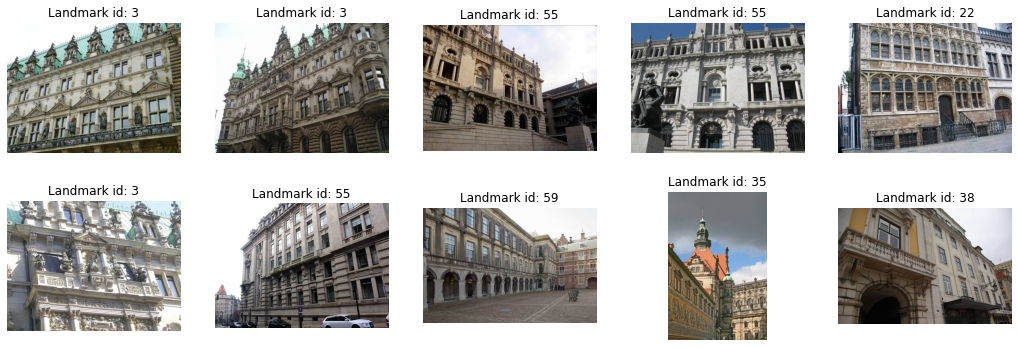

In [61]:
query_image_index = 1
top_n = 10

image_id = os.path.split(val_embeddings['images_paths'][query_image_index])[1]
query_landmark_id = os.path.split(os.path.split(val_embeddings['images_paths'][query_image_index])[0])[1]

similar_n = reranked_df['top_similar'][:top_n]

print(f"Queried image: {image_id}")
plt.figure(figsize = (6, 6))
plt.imshow(get_image(val_embeddings['images_paths'][query_image_index]))
plt.title(f"Landmark id: {query_landmark_id}")
plt.axis("off")
plot_similar(similar_n, train_embeddings['images_paths'])

Queried image: 8bd931f212ed57f2.jpg


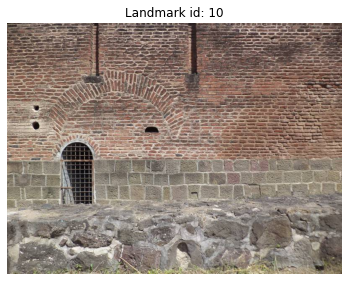

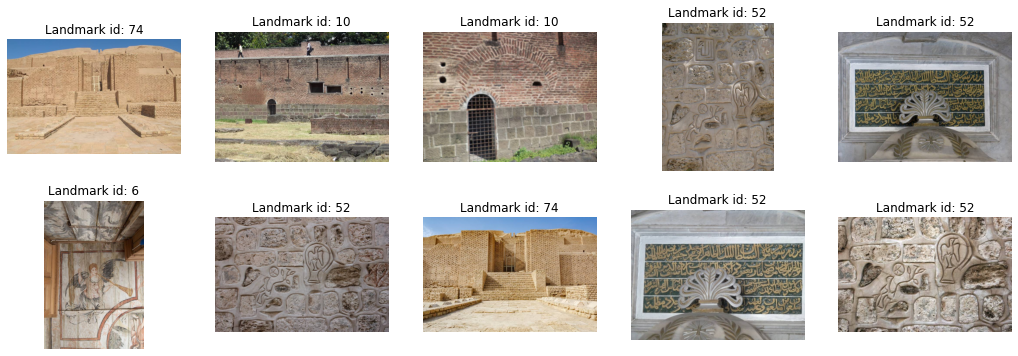

In [63]:
query_image_index = 2
top_n = 10

image_id = os.path.split(val_embeddings['images_paths'][query_image_index])[1]
query_landmark_id = os.path.split(os.path.split(val_embeddings['images_paths'][query_image_index])[0])[1]

similar_n = np.argsort(val_train_similarity[query_image_index])[::-1][:top_n]

print(f"Queried image: {image_id}")
plt.figure(figsize = (6, 6))
plt.imshow(get_image(val_embeddings['images_paths'][query_image_index]))
plt.title(f"Landmark id: {query_landmark_id}")
plt.axis("off")
plot_similar(similar_n, train_embeddings['images_paths'])

In [64]:
confidence_df = confidence_top(query = val_embeddings,
                               key = train_embeddings,
                               similarity = val_train_similarity,
                               query_image_index = query_image_index,
                               top = top_n)

confidence_df

top_similar                                        image_paths  prediction  \
0          160  /kaggle/working/train_sub/74/1fc5b489991c3e96.jpg          74   
1         2019  /kaggle/working/train_sub/10/af01e9aec2f8c641.jpg          10   
2         1095  /kaggle/working/train_sub/10/9560ce833ccc5eca.jpg          10   
3         8500  /kaggle/working/train_sub/52/3ff86807e481b44d.jpg          52   
4         7292  /kaggle/working/train_sub/52/2c87bae6c3380a14.jpg          52   
5         7671   /kaggle/working/train_sub/6/5b33611ef998f9e0.jpg           6   
6         7499  /kaggle/working/train_sub/52/230d143e6eb4ec30.jpg          52   
7         4340  /kaggle/working/train_sub/74/f44dc951556233f6.jpg          74   
8         5304  /kaggle/working/train_sub/52/a8576eb13e2d084f.jpg          52   
9         6357  /kaggle/working/train_sub/52/1f1227591bfabdc3.jpg          52   

   cos_similarity  
0        0.690753  
1        0.644633  
2        0.617240  
3        0.577733  
4        0.565195  
5        0.564067  
6        0.562404  
7        0.548284  
8        0.545019  
9        0.544400

In [70]:
reranked_df = delf_rerank(query = val_embeddings,
                          key = train_embeddings,
                          query_image_index = query_image_index,
                          confidence_df = confidence_df,
                          re_sort = True)
reranked_df

Retrieving local features for top 10 key images...


100%|██████████| 10/10 [00:09<00:00,  1.04it/s]


top_similar                                        image_paths  prediction  \
2         1095  /kaggle/working/train_sub/10/9560ce833ccc5eca.jpg          10   
1         2019  /kaggle/working/train_sub/10/af01e9aec2f8c641.jpg          10   
0          160  /kaggle/working/train_sub/74/1fc5b489991c3e96.jpg          74   
9         6357  /kaggle/working/train_sub/52/1f1227591bfabdc3.jpg          52   
3         8500  /kaggle/working/train_sub/52/3ff86807e481b44d.jpg          52   
6         7499  /kaggle/working/train_sub/52/230d143e6eb4ec30.jpg          52   
7         4340  /kaggle/working/train_sub/74/f44dc951556233f6.jpg          74   
5         7671   /kaggle/working/train_sub/6/5b33611ef998f9e0.jpg           6   
4         7292  /kaggle/working/train_sub/52/2c87bae6c3380a14.jpg          52   
8         5304  /kaggle/working/train_sub/52/a8576eb13e2d084f.jpg          52   

   cos_similarity  inliers  reranked_conf  
2        0.617240      100       6.172403  
1        0.644633       25       3.223164  
0        0.690753        9       2.072260  
9        0.544400        7       1.440347  
3        0.577733        6       1.415152  
6        0.562404        6       1.377603  
7        0.548284        5       1.226001  
5        0.564067        4       1.128134  
4        0.565195        3       0.978947  
8        0.545019        0       0.000000

Queried image: 8bd931f212ed57f2.jpg


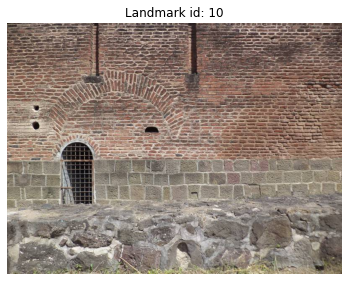

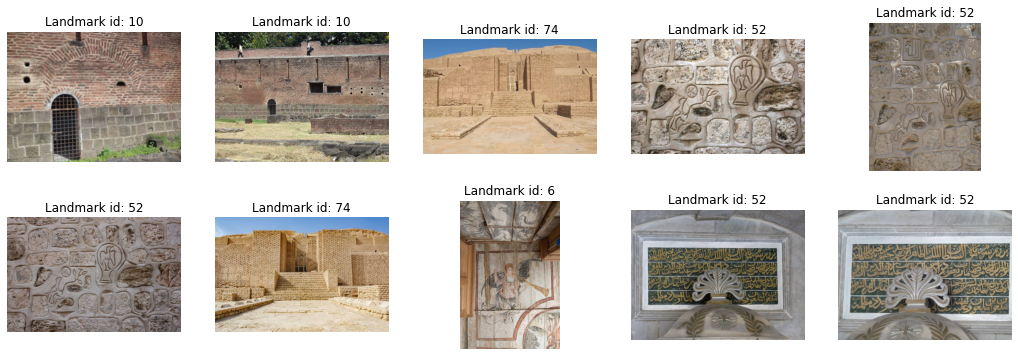

In [71]:
query_image_index = 2
top_n = 10

image_id = os.path.split(val_embeddings['images_paths'][query_image_index])[1]
query_landmark_id = os.path.split(os.path.split(val_embeddings['images_paths'][query_image_index])[0])[1]

similar_n = reranked_df['top_similar'][:top_n]

print(f"Queried image: {image_id}")
plt.figure(figsize = (6, 6))
plt.imshow(get_image(val_embeddings['images_paths'][query_image_index]))
plt.title(f"Landmark id: {query_landmark_id}")
plt.axis("off")
plot_similar(similar_n, train_embeddings['images_paths'])

Queried image: 2042d35320a8e127.jpg


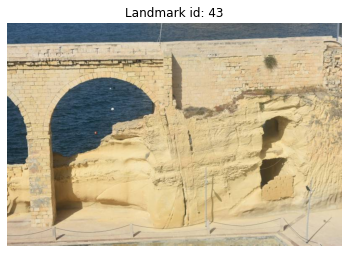

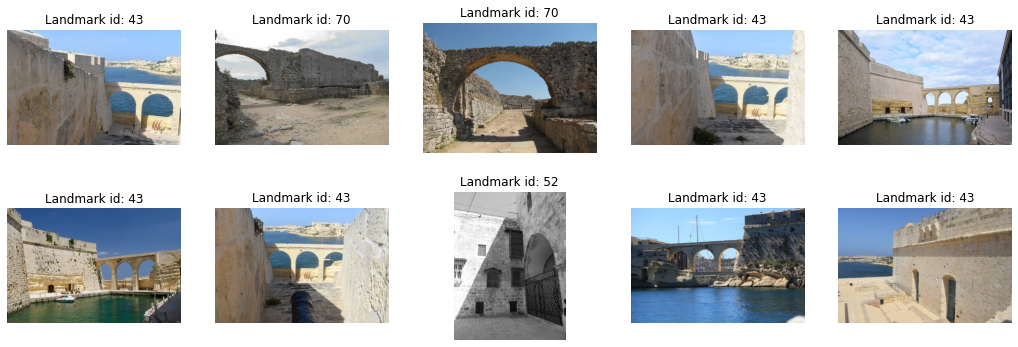

In [227]:
query_image_index = 101
top_n = 10

image_id = os.path.split(val_embeddings['images_paths'][query_image_index])[1]
query_landmark_id = os.path.split(os.path.split(val_embeddings['images_paths'][query_image_index])[0])[1]

similar_n = np.argsort(val_train_similarity[query_image_index])[::-1][:top_n]

print(f"Queried image: {image_id}")
plt.figure(figsize = (6, 6))
plt.imshow(get_image(val_embeddings['images_paths'][query_image_index]))
plt.title(f"Landmark id: {query_landmark_id}")
plt.axis("off")
plot_similar(similar_n, train_embeddings['images_paths'])

In [228]:
confidence_df = confidence_top(query = val_embeddings,
                               key = train_embeddings,
                               similarity = val_train_similarity,
                               query_image_index = query_image_index,
                               top = top_n)

confidence_df

top_similar                                        image_paths  prediction  \
0         6163  /kaggle/working/train_sub/43/aab1d3e70d649d2c.jpg          43   
1         5213  /kaggle/working/train_sub/70/14857abf5d812470.jpg          70   
2         2119  /kaggle/working/train_sub/70/14a3f6d749a93487.jpg          70   
3         5148  /kaggle/working/train_sub/43/639ac55944bcf787.jpg          43   
4         8439  /kaggle/working/train_sub/43/0dcf580533f1d856.jpg          43   
5          414  /kaggle/working/train_sub/43/1c8008684140469d.jpg          43   
6         6622  /kaggle/working/train_sub/43/303a3a94dadc52f4.jpg          43   
7         9652  /kaggle/working/train_sub/52/adc61785cdf95c46.jpg          52   
8         2274  /kaggle/working/train_sub/43/96fdb3e8bb0fbf35.jpg          43   
9         8704  /kaggle/working/train_sub/43/309d4d01bd57be5d.jpg          43   

   cos_similarity  
0        0.766288  
1        0.718219  
2        0.703141  
3        0.702235  
4        0.682921  
5        0.676381  
6        0.674131  
7        0.655948  
8        0.628031  
9        0.627753

In [229]:
reranked_df = delf_rerank(query = val_embeddings,
                          key = train_embeddings,
                          query_image_index = query_image_index,
                          confidence_df = confidence_df,
                          re_sort = True)
reranked_df

Retrieving local features for top 10 key images...


100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


top_similar                                        image_paths  prediction  \
0         6163  /kaggle/working/train_sub/43/aab1d3e70d649d2c.jpg          43   
6         6622  /kaggle/working/train_sub/43/303a3a94dadc52f4.jpg          43   
3         5148  /kaggle/working/train_sub/43/639ac55944bcf787.jpg          43   
5          414  /kaggle/working/train_sub/43/1c8008684140469d.jpg          43   
4         8439  /kaggle/working/train_sub/43/0dcf580533f1d856.jpg          43   
8         2274  /kaggle/working/train_sub/43/96fdb3e8bb0fbf35.jpg          43   
2         2119  /kaggle/working/train_sub/70/14a3f6d749a93487.jpg          70   
9         8704  /kaggle/working/train_sub/43/309d4d01bd57be5d.jpg          43   
1         5213  /kaggle/working/train_sub/70/14857abf5d812470.jpg          70   
7         9652  /kaggle/working/train_sub/52/adc61785cdf95c46.jpg          52   

   cos_similarity  inliers  reranked_conf  
0        0.766288       37       4.661151  
6        0.674131       39       4.209949  
3        0.702235       35       4.154477  
5        0.676381       30       3.704694  
4        0.682921       28       3.613677  
8        0.628031       16       2.512125  
2        0.703141       12       2.435753  
9        0.627753       12       2.174599  
1        0.718219        9       2.154656  
7        0.655948        9       1.967843

Queried image: 2042d35320a8e127.jpg


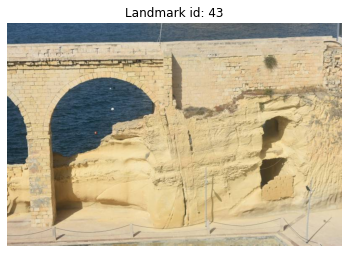

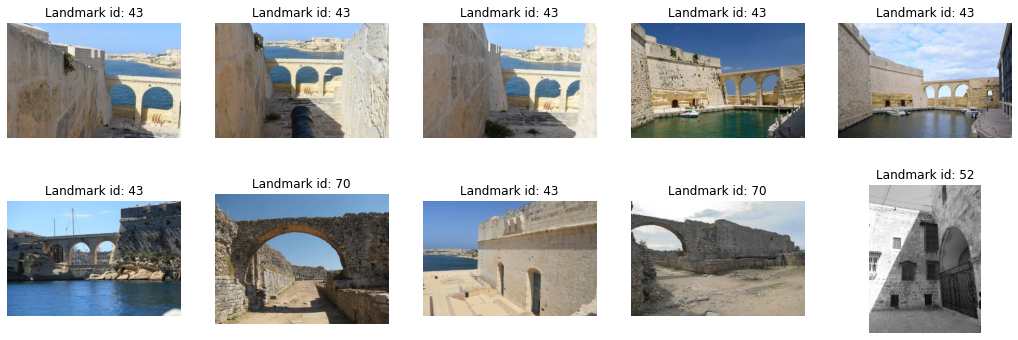

In [230]:
query_image_index = 101
top_n = 10

image_id = os.path.split(val_embeddings['images_paths'][query_image_index])[1]
query_landmark_id = os.path.split(os.path.split(val_embeddings['images_paths'][query_image_index])[0])[1]

similar_n = reranked_df['top_similar'][:top_n]

print(f"Queried image: {image_id}")
plt.figure(figsize = (6, 6))
plt.imshow(get_image(val_embeddings['images_paths'][query_image_index]))
plt.title(f"Landmark id: {query_landmark_id}")
plt.axis("off")
plot_similar(similar_n, train_embeddings['images_paths'])

## Under-represented query image
Effect of querying images not well represented on the key set

Queried image: 87efcb323df2f906.jpg


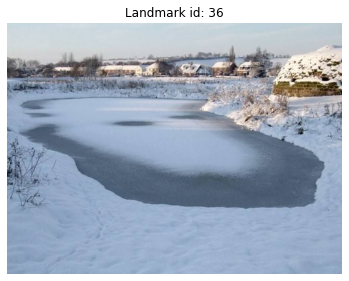

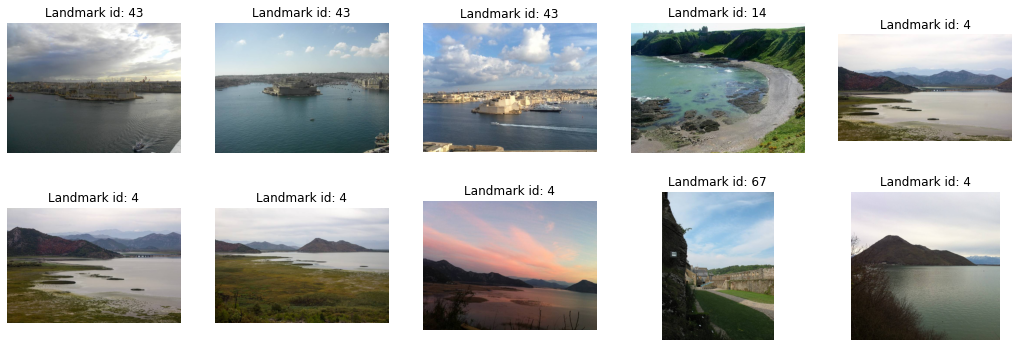

In [91]:
query_image_index = 8
top_n = 10

image_id = os.path.split(val_embeddings['images_paths'][query_image_index])[1]
query_landmark_id = os.path.split(os.path.split(val_embeddings['images_paths'][query_image_index])[0])[1]

similar_n = np.argsort(val_train_similarity[query_image_index])[::-1][:top_n]

print(f"Queried image: {image_id}")
plt.figure(figsize = (6, 6))
plt.imshow(get_image(val_embeddings['images_paths'][query_image_index]))
plt.title(f"Landmark id: {query_landmark_id}")
plt.axis("off")
plot_similar(similar_n, train_embeddings['images_paths'])

Let's investigate what the model has seen for landmark 36 during training...

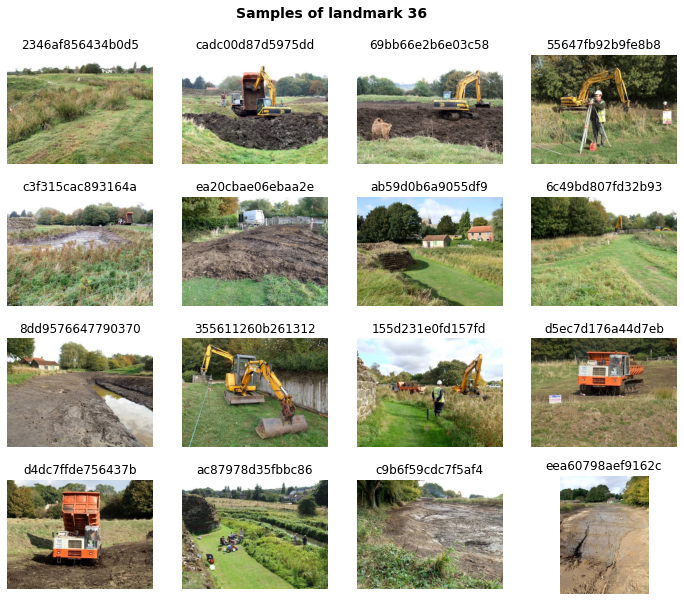

In [172]:
get_landmark(36)

Query image has a representative issue when considering how the landmark appears on key set and how it was seen during training